<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM452/Chemical_Kinetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Numerical Integration of first order rate laws


## First order

We want to numerically integrate the rate laws for the first order equilibrium, A->B. First we define a function to describe our rate equations. 

In [2]:
def rxn1st(c,t,k1):
  A=c[0]
  r1=k1*A #k1*(concentation of A) 
  
  dAdt=-r1 #rate of change of A decreased by forward reaction and increased by reverse reaction
  dBdt=r1 #rate of change of B increased by forward reaction and decreased by reverse reaction
  
  return(dAdt,dBdt)

Here we have defined a function, `rxn1st`, that returns the derivatives of A and B as given by the rate laws. This is necessary for the differential equation solver. In addition we need to set up a few variables like the times we want to evaluate, the initial concentrations, and the rate constants.

Here, for no particular reason, we assign $M_0$ as the vector containing the initial concentrations [A]<sub>0</sub> and [B]<sub>0</sub> and assign them values of 1 and 0, respectively.

Then call the Ordinary Differential Equation INTegrator function (odeint) using the rxn1st function we defined above, the initial concentration vector (M0), the times we want to evaluate (t), and the rate constants.

In [3]:
t=np.linspace(0,10,101) # define t. The first number is the beginning point, the second number is the end, and the third is the number of points.
c0=[1,0] #initial concentrations of A and B
k=1.0, # the one rate constant. The trailing comma is necessary if there is only one k value.
C=odeint(rxn1st,c0,t,k) # solve the DEs. 

After solving, the result is stored in C a list of lists. The outermost list contains, for each time in `t`, a list containing the concentration of A and the concentration of B. 

C[0] will get us these concentrations at the first time slice. C[0,0] will get us the first concentration ([A]) at that first time slice. 

In [4]:
C[0]

array([1., 0.])

This says that the concentrations at time zero are exactly what we assigned them to be.

Here we can separate it out by getting all of the first column (column 0) and assigning it to cA and all of column 1 and assigning it to cB. We can do this using a ':' instead of a number in place of the first zero following the C[. C[:,0] means make a new list containing all the A concentration values for all the time slices. Likewise C[:,1] will get all the B concentrations.

In [38]:
cA=C[:,0] #define cA to give the concentration from the first element of each of the lists for each time slice
cB=C[:,1] #do the same for the second element of each of the lists...

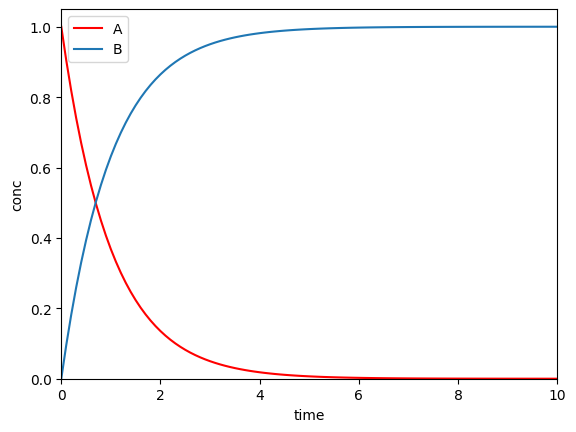

In [39]:
plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,label='B')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t))
plt.ylim(0,1.05*max(max(cA),max(cB)))
plt.legend()
plt.show()

See what would change if you make $k=10$ or $k=0.1$. [You'll need to go back to where *k* is defined and solve the differential equations again and execute the cells that follow to see how the graph changes.] \\

See what would change if you make $[A]_o=0.5$ or $[B]_o=0.5$.


#Equilibrium (first order both ways)
Of course we can analytically solve the first order rate law quite easily without a computer. We can fix up our function to cover more complex cases by including the backward reaction. For now we'll assume first order in both directions.

In [9]:
def rxn1st_equilibrium(c,t,k1,k2):
  A,B= [c[i] for i in range(len(c))] # assign names to the values in the initial concentration list
              # c is a list of conc. For each one up to the last one [range(len(c))], assign a name. A and B here.
              # we could also set A=c[0]; B=c[1]; C=c[2] for the same effect.
  r1=k1*A # rate of forward reaction
  r2=k2*B # rate of backward reaction

  dAdt=-r1+r2 #rate of change of A decreased by forward reaction and increased by reverse reaction
  dBdt=r1-r2 #rate of change of B increased by forward reaction and decreased by reverse reaction
  
  return(dAdt,dBdt)

Combining the setup concentrations, rate constants, solving the set of differential equations, and plotting...

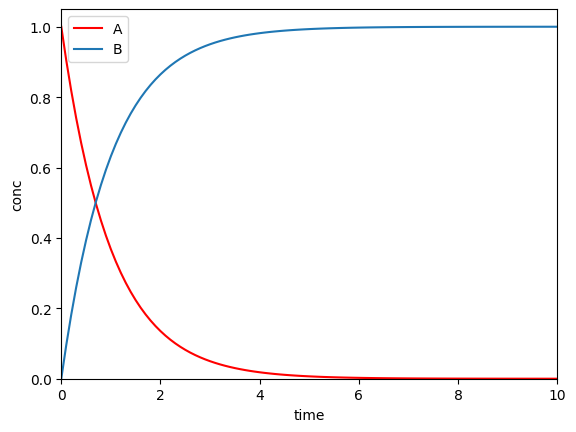

In [43]:
#@title  { run: "auto" }
t=np.linspace(0,10,101)

cA0=1 #@param {type:"slider", min:0, max:1.5, step:0.1}
cB0=0 #@param {type:"slider", min:0, max:1.5, step:0.1}
c0=[cA0,cB0] #A0 and B0

k1 = 1 #@param {type:"slider", min:0, max:10, step:0.2}
k2 = 0 #@param {type:"slider", min:0, max:10, step:0.2}
k_vals=k1,k2

C=odeint(rxn1st_equilibrium,c0,t,k_vals) # solve the rate equations in rxn1st_equilibrium
cA=C[:,0] 
cB=C[:,1]

plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,label='B')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t)) # not really necessary unless we want to change our view of the x-axis to less than full scale.
plt.ylim(0,1.05*max(max(cA),max(cB))) #likewise not needed except that I like a little extra room at the top.
plt.legend()
plt.show()

Using the constants and initial concentrations given should give us the same result as we got with only the forward reaction. 

Modify the code below to graph the concentations of A and B if $[A]_o$=1 and $[B]_o=0$ for k<sub>1</sub>=1 and k<sub>2</sub>=.5 \\
How do things change? \\


What happens if $k_2$ is twice as big as $k_1$?




Try some other values of initial concentrations and rate constants. 


## Second order

Modify the function to calculate for an equilibrium that is second order reactions in both directions. In Python, powers are signified by \*\*, as in 2\**3=8.

In [ ]:
def rxn2nd(M,t,k1,k2):
  A,B=[M0[i] for i in range(len(M0))] 
  r1=   #forward
  r2=   #backward
  
  dAdt=-r1+r2 #rate of change of A decreased by forward reaction and increased by reverse reaction
  dBdt=r1-r2 #rate of change of B increased by forward reaction and decreased by reverse reaction
  
  return(dAdt,dBdt)

Plot for $k_1$=1, $k_2$=0, $A_0$=1, and $B_0$=0

Modify rate constants and concentrations and justify the results.

Plot for $k_1$=1, $k_2$=0.5, $A_0$=1, and $B_0$=0

*How does this differ from the first order equilibrium?*

## Multi step reactions

Modify to calculate for reactions A$\rightarrow$B and also A$\rightarrow$C at the same time.


In [6]:
def rxn(c,t,k1,k2 ):
  A,B,C=[c[i] for i in range(len(c))]

  r1=k1*A #k1*(concentation of A)
  r2=k2*A #k2*(concentration of A)
  dAdt=-r1-r2 #A decreased by each reaction
  dBdt=r1 # B changed by first reaction
  dCdt=r2 # C changed by second reaction
  return(dAdt,dBdt,dCdt)

In [ ]:
#@title rate constants { run: "auto" }
k1 = 1 #@param {type:"slider", min:0, max:10, step:0.5}
k2 = 0 #@param {type:"slider", min:0, max:10, step:0.5}
kvals=k1,k2
t=np.linspace(0,10,100)
c0=[1,0,0] # initial concentrations 


C=odeint(rxn,c0,t,kvals)
cA=C[:,0] 
cB=C[:,1] 
cC=C[:,2]
plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,'b-',label='B')
plt.plot(t,cC,'green',linestyle='-',label='C')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t))
plt.ylim(0,1.05*max(cA)) # make the upper y-limit 5% higher than the initial cA
plt.legend()
plt.show()

**Predict results and plot for $k_1>>k_2$, for $k_1<<k_2$, and for $k_1≈k_2$.**


**Modify (below) to calculate for a reaction like A$\rightleftharpoons$B$\rightarrow$C**

Use variable names that are easy to decipher later. You might use `r1f=` and `r1b=` along with `k1f` and `k1b` for step 1 **f**orward and **b**ackward.

**What additional terms will be needed? **

**Will any change be needed to plot the results?**

In [34]:
def rxn(M,t,k1,k2):
  A,B,C=[M0[i] for i in range(len(M0))] 
  r1=k1*A #k1*(concentation of A)
  r2=k2*B #k2*(concentration of B)
  dAdt=-r1 #rate of change of A decreased by forward reaction and increased by reverse reaction
  dBdt=r1-r2 #rate of change of B increased by forward reaction and decreased by reverse reaction
  dCdt=r2
  return(dAdt,dBdt,dCdt)

In [ ]:
t=np.linspace(0,10,100)
M0=[1,0,0]
k1=5
k2=.1 
k3=1
C=odeint(rxn,M0,t,(k1,k2,k3))
cA=C[:,0] 
cB=C[:,1] 
cC=C[:,2] 
plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,'b-',label='B')
plt.plot(t,cC,'-',color='purple',label='C')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t))
plt.ylim(0,1.05*max(cA))
plt.legend()
plt.show()

**Predict results and plot for $k_{1f}>>k_2/k_{1b}$, for $k_{1f}<<k_2/k_{1b}$, and for $k_1≈k_2/k_{1b}$.**


#Approximate Methods
It's nice to be able to solve the equations numerically and get graphs of the concentration. These graphs result in complete descriptions of how things change but, consisting solely of lists of numbers, it can be difficult, especially as the mechanisms get more complicated, to accuratly describe or predict the differences expected between similar mechanisms. 
In addition to numerically solving for the concentrations, it is also possible to apply one of two major approximations and get symbolic results.
##Equilibrium approximation
If a later step in the mechanism is slow (rate determining) and an earlier step is an equilibrium, the rate law overall will be the rate law of the slow step which will almost certainly contain an intermediate. The equilibrium approximation is applied by assuming that equilibrium for the early step is achieved and so the concentration of the intermediate can be determined in terms of the reactants. 

For a first-order reaction, A$\rightleftharpoons$B$\rightarrow$C, having forward and backward rate constants of $k_1$ and $k_{-1}$ and a second step rate constant of $k_2$ which will be small, if equilibrium is estabilished, $k_1[A]=k_{-1}[B]$ so the intermediate [B] will have a concentration of $[B]=\dfrac{k_1[A]}{k_{-1}}$ and the reaction will have an overall rate determined from the second step of $$rate=k_2[B]=k_2\dfrac{k_1[A]}{k_{-1}}$$

Of course the second step does not have a rate of zero so the first step does not truly reach equilibrium and the concentration of [B] is presumably zero at the beginning whereas the approximation suggests that it is always some non-zero fraction of [A]. However, for reactions that have a slow step after an equilibrium step, this approximation is likely a reasonable one.

The equilibrium approximation is also called the pre-equilibrium approximation or the prior-equilibrium approximation to suggest that the equilibruim occurs prior to the rate determining step.

## Steady-state approximation
In the opposite case where slow step occurs first, an appropriate approximation would assume that all the intermediate gets used as soon as it is formed so the rate of formation of intermediate is effectively zero. For a first-order reaction, A$\rightleftharpoons$B$\rightarrow$C, having forward and backward rate constants of $k_1$ and $k_{-1}$ and a second step rate constant of $k_2$ the steady-state approximation would indicate that $$\dfrac{d[B]}{dt}=k_1[A]-k_{-1}[B]-k_2[B]≈0 $$
Now we can solve this equation for [B] and find the overall rate of formation of the product, C, using this expression. If there are more intermediates and they are needed for the overall rate law, we can use the steady state approximation on all of them.
The steady-state approximation does not require that the formation of product is fast; it only requires that the intermediate not change significantly in concentration. If the backwards first step is fast and removes the intermediate as quickly as soon as it's formed, that's good enough. In this way the steady-state approximation also fits some cases covered by the equilibrium approximation.

**Now let's apply approximations and see when they fit best. **

In [ ]:
#These are just copied from above so that we can easily make adjustments. We can change them to work for other reactions too but we would need to define a new function to return the rates of each species.
t=np.linspace(0,10,100)
c0=[1,0,0]

k1=1
k2=.1 
k3=.1
kvals=k1,k2,k3

C=odeint(rxn,c0,t,kvals)

cA=C[:,0]
cB=C[:,1]
cC=C[:,2]

In [ ]:
B_ss=[]
B_pe=[]
for ca in cA: # for each value of cA from above
  B_ss.append(k1f*cA/(k1b+k2)) # input the expression that would calculate the result for [B] according to the steady state calculation
  B_pe.append(k1f*Ca/k1b ) # input the expression that would calculate the result for [B] according to the pre-equilibrium calculation
plt.plot(t,cB,'b-',label='exact solution')
plt.plot(t,B_ss,'r--',label='steady state')
plt.plot(t,B_pe,'g--',label='prior equilibrium')
plt.xlim(0,max(t))
plt.ylim(0,1)
plt.legend()
plt.show()

Let's determine the \%deviation for each method.

In [ ]:
ratio_ss=[]
ratio_pe=[]
for i in range(1,len(t)): #start at 1 to avoid division by zero
  ratio_ss.append((B_ss[i]-cB[i])/cB[i]*100) #percent difference of approximation
  ratio_pe.append(abs(B_pe[i]-cB[i])/cB[i]*100) #percent difference
plt.plot(t[1:],ratio_ss,label='ss') # use all values of t after the zeroth one.
plt.plot(t[1:],ratio_pe,label='pe')
plt.ylim(-100,100)
plt.legend()
plt.ylabel('% deviation from actual concentration')
plt.xlabel('time')
plt.show()

Try values of the $k$'s so that the steady state approximation has the lowest absolute error and values of the $k$'s such that the pre-equilibrium approximation has the lowest absolute error.

So we can see that it is possible to numerically calculate the solutions to systems of rate equations. It is also possible to approximate them using one or the other of two approximations. The choice of which approximation to use hinges on knowledge or guesses about the relative speeds of the various elementary steps. Calculating numerically to get a graph of concentration of all species versus time is useful. Approximating to get a symbolic expression for the rate law is also useful especially as it provides clues as to how the order might change at the extremes of concentrations of various chemical species.

## Getting Symbolic Expressions for Approximations


### Steady State
Find a symbolic representation of the overall rate of formation of product for the mechanism $$\Delta + \Delta ⇌ \Delta + \Delta^*$$$$\Delta^* ⟶ \textrm{propene}$$
Here, in order for the approximation to be valid, we're assuming that the intermediate has a way of reacting away which means here that either $k_{1b}$ or $k_2$ is large compared to $k_{1f}$.

In [23]:
import sympy as sp
t=sp.symbols('t')
cpe=sp.Function('[\Delta^* ]')(t)  # declare a function (of time) for cyclopropane excited
cp=sp.symbols('[\Delta]')         # cyclopropane
pr=sp.Function('[propene]')(t)    # propane
k1f,k1b,k2=sp.symbols('k_{1f},k_{1b},k_2') # define symbols for the rate constants

In [ ]:
cpe_ss=sp.Eq(sp.diff(cpe,t),k1f*cp**2-cpe*cp*k1b-k2*cpe) # rate of change of intermediate (cpe)
display(cpe_ss)
display(cpe_ss.subs(sp.diff(cpe,t),0)) # set equal to zero
cpe_ss=sp.solve(cpe_ss.rhs,cpe)[0] # solve for intermediate cpe as function of reactant (cp)
display(sp.Eq(cpe,cpe_ss))


In [ ]:
rate=sp.Eq(sp.diff(pr,t),k2*cpe) # an equation for the rate law for change of propane (pr) 
rate

Of course the rate law can't include an intermediate but we know what this concentration is already. Substitution of that into this rate expression should get us what we're looking for.

In [ ]:
rate.subs(cpe,cpe_ss)

When we end up with a denominator which includes a sum, we have the chance to simplify by exploring the extremes of concentration or rate constant magnitude. Here, if we assume *low enough* cyclopropane concentration, we will eventually get to a point where the first denominator term is negligible compared to $k_2$. This will simplify to $$rate=k_{1f}\Delta^2$$ which is just the forward rate law for the first step indicating that this step is the rate-determining step.


On the other hand, if the cyclopropane concentration is *high enough*, we get $$rate=k_2\dfrac{k_{1f}}{k_{1b}}\Delta$$ It's less clear here what the rate-determing step is. If we write the ratio of the rate constants as the equilibrium constant, $\dfrac{k_{if}}{k_{1b}}=\dfrac{[\Delta][\Delta^*]}{[\Delta]^2}$ then the rate expression simplifies to $$rate=k_2\dfrac{[\Delta]^2[\Delta^*]}{[\Delta]^2}=k_2{[\Delta^*]}$$ While this is not an acceptable rate law because it involves an intermediate, it does indicate which step is rate determining in this case as this is the rate law for the second step. If the steady state approximation is to hold here, assuming a slow second step means that the backwards first step must be fast.

So the symbolic version of the steady state approximation shows us that, if the approximation holds, a transition between second and first order must take place as we move from low to high concentration of the reactant. Of course this transition may take place at unreasonably high or low concentrations such that we never notice it. Nevertheless locating such a transition would be a piece of evidence for the truth of such a mechanism.

###Equilibrium Approximation

While it is possible that the first step comes to equilibrium under steady-state conditions (if the backwards reaction is sufficiently fast), it's also possible for equilibrium to be achieved under more general conditions if the second step is slow enough. This would lead to $K_{eq}=\dfrac{k_{if}}{k_{1b}}=\dfrac{[\Delta][\Delta^*]}{[\Delta]^2}$ which could be solved for $$[\Delta^*]=\dfrac{k_{1f}}{k_{1b}}[\Delta]$$ Substituting this into the rate law for the production of propene gives $$rate=k_2[\Delta^*]=k_2\dfrac{k_{1f}}{k_{1b}}[\Delta]$$ The result in this case is identical to the steady state approximation result under high cyclopropane concentrations. In that case, we found that the second step was the rate-determining step. Here we *assumed* this. As such, it makes sense that the results are the same.

It is not unusual to find that the equilibrium approximation solution is a subset of the steady-state approximation solution. We, therefore, often initialy assume the steady state approximation and fall back on the equilibrium approximation if we have information that would invalidate the assumptions of the steady-state approximation.

Let's let sympy solve for the rate as we did for the steady state approximation.

In [28]:
Keq=k1f/k1b

In [ ]:
cpe_eq=sp.Eq(Keq,cp*cpe/cp**2)
cpe_eq

In [ ]:
cpe_eq=sp.Eq(cpe,sp.solve(cpe_eq,cpe)[0])
cpe_eq

In [ ]:
rate=sp.Eq(sp.diff(pr,t),k2*cpe.subs(cpe,cpe_eq.rhs))
rate